<center>
    <br />
    <h1>Работа с Web</h1>
    <br />
    <h4>2018</h4>
</center>

## Ключевые слова

* IP
* TCP/UDP
* DNS
* HTTP(S)
* HTML

## IP и порты

* IP адрес - это уникальный идентификатор некоторого устройства в сети Интернет.
* Порт - это endpoint для посылки/получения пакетов в операционной системе. Порты варьируются в диапазоне 0-65535.

### Common значения портов

* 22 - порт для ssh (secure shell)
* 80 - порт для http
* 443 - порт для https
* 25 - порт для smtp (simple mail transfer protocol)
* 53 - порт для dns

## IP

* ipv4 - 32-битный (4 октета): `77.88.55.80`
* ipv6 - 128-битный (16 октетов): `2a02:6b8:a::a`

### UDP

* Ненадежный: нет возможности узнать, дошел ли пакет
* Неупорядоченный: пакеты могут приходить к получателю не в том порядке, что они были отправлены
* Легкий: не нужны доп. расходы в переупорядочивании, подтверждении доставки и т.д. Поэтому он пригоден, когда нет необходимости в большой надежности и нужны высокая пропускная способность
* Датаграммы: пакеты шлются независимо

### TCP

* Для работы необходимо сначала установить соединение, сделав handshake.
* Надежный: есть механизм подтверждения пакетов, перепосылки и таймаутов.
* Упорядоченный: сообщения доставляются получателю в том порядке, в котором они были отправлены.
* Тяжелый: необходимо отправить 3 пакета, чтобы установить соединение, и только после этого можно отправлять полезные данные.

# <img src="https://www.studytonight.com/network-programming-in-python/images/networking-terminologies-1.png">

## DNS (Domain Name System)

Иерархическая система, которая преобразует ip-адреса в названия хостов и обратно.

In [1]:
import socket

print(socket.gethostbyname('yandex.ru'))
print(socket.gethostbyaddr('77.88.55.80'))

5.255.255.5
('yandex.ru', [], ['77.88.55.80'])


## HTTP (Hyper-Text Transfer Protocol)

# <img src="http://www.ntu.edu.sg/home/ehchua/programming/webprogramming/images/HTTP_Steps.png">

# <img src="http://www.ntu.edu.sg/home/ehchua/programming/webprogramming/images/HTTP_RequestMessage.png">

* Request line: `request-method-name request-URI HTTP-version`
* Request headers: `request-header-name: request-header-value1, request-header-value2, ...`

### Пример HTTP-запроса

```
GET /docs/index.html HTTP/1.1
Host: www.nowhere123.com
Accept: image/gif, image/jpeg, */*
Accept-Language: en-us
Accept-Encoding: gzip, deflate
User-Agent: Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1)
(blank line)
```

# <img src="http://www.ntu.edu.sg/home/ehchua/programming/webprogramming/images/HTTP_ResponseMessage.png">

* Status line: `HTTP-version status-code reason-phrase`
* Response headers: `response-header-name: response-header-value1, response-header-value2, ...`

### HTTP STATUS CODE

- 2xx - OK
- 3xx - Redirect
- 4xx - You have a problem
- 5xx - I have a problem

### Пример HTTP-ответа

```
HTTP/1.1 200 OK
Date: Sun, 18 Oct 2009 08:56:53 GMT
Server: Apache/2.2.14 (Win32)
Last-Modified: Sat, 20 Nov 2004 07:16:26 GMT
ETag: "10000000565a5-2c-3e94b66c2e680"
Accept-Ranges: bytes
Content-Length: 44
Connection: close
Content-Type: text/html
X-Pad: avoid browser bug
  
<html><body><h1>It works!</h1></body></html>
```

## HTTP Request Methods

* GET - получаем информацию о ресурсе от сервера
* HEAD - получаем лишь заголовки ответа без данных
* POST - отправляем данные на сервер
* PUT - сохраняем данные на сервере
* PATCH, OPTIONS и т.д.

### Сокет

Сокет - это endpoint для двустороннего, point-to-point канала коммуникации.

# <img src="https://www.studytonight.com/network-programming-in-python/images/basics-of-sockets-1.png">

## Простейший сервер

``` python
#!/usr/bin/env python3

import socket

s = socket.socket()
port = 9999

s.bind(('localhost', port))

print("Waiting for connection...")	
s.listen(5)

try:
    while True:
        conn,addr = s.accept()
        print('Got Connection from', addr)
        conn.send(b'Server Saying Hi')
        conn.close()
except KeyboardInterrupt:
    pass
finally:
    print('closing socket')
    s.close()
```

### Простой клиент

```python
import socket			

s = socket.socket()		
port = 9999

s.connect(('localhost', port))
print(s.recv(1024))

s.close()
```

# <img src="https://www.studytonight.com/network-programming-in-python/images/working-with-tcp-sockets-5.png">

### Библиотека requests

HTTP for Humans™

Requests is the only Non-GMO HTTP library for Python, safe for human consumption.

In [2]:
import requests

r = requests.get('http://ip.jsontest.com/')
print(r.status_code)
print(r.headers['content-type'])
print(r.encoding)
print(r.text)
print(r.json())

200
application/json; charset=ISO-8859-1
ISO-8859-1
{"ip": "2a02:6b8:b010:d004::1:34"}

{'ip': '2a02:6b8:b010:d004::1:34'}


In [6]:
from IPython.core.display import HTML

r = requests.get('https://yandex.by/search/?text=погода%20в%20минске')

print(r.text)

<!DOCTYPE html><html class=i-ua_js_no lang=ru><meta charset=utf-8><meta http-equiv=X-UA-Compatible content="IE=edge"><title>Яндекс</title><script nonce=6538>document.documentElement.className="i-ua_js_yes i-ua_svg_yes";(screen.deviceXDPI&&screen.logicalXDPI&&screen.deviceXDPI/screen.logicalXDPI||window.devicePixelRatio)>1&&(document.documentElement.className+=" i-ua_retina_yes");</script><link rel=search title="Яндекс" type="application/opensearchdescription+xml" href="/search/opensearch.xml"><meta name=referrer content=always><style nonce=6538 data-role=css data-stylesheet=header>.b-statcounter{position:absolute;left:-9999px}body{margin:0}.b-page__body{margin:0;color:#000;background:#fff;height:100%;padding:0;font-family:Arial,Helvetica,sans-serif;font-size:13px;line-height:1.154}.i-ua_platform_ios.b-page__body{-webkit-tap-highlight-color:rgba(0,0,0,0);cursor:auto}html{height:100%}.b-page.b-page_js_inited.b-page_overflow_hidden,.b-page_initial-scroll_yes.b-page_js_inited.b-page_overfl

### HTML

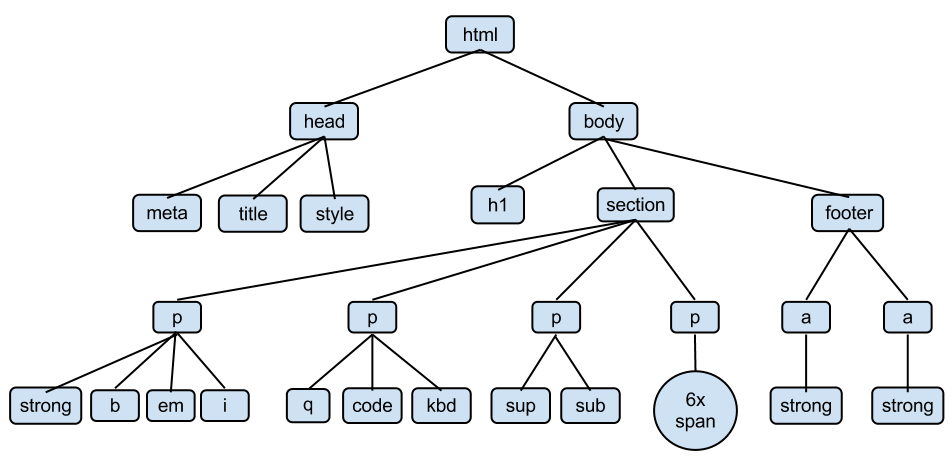

In [4]:
from IPython.display import Image
Image('http://www.openbookproject.net/tutorials/getdown/css/images/lesson4/HTMLDOMTree.png')

### Библиотеки для парсинга

* BeautifulSoup - написана на python, удобный интерфейс, но не очень быстрая
* lxml - биндинг для библиотеки `libxml2`, написанной на C, умеет парсить xml и html, но интерфейс более сложный.

In [7]:
import lxml
from bs4 import BeautifulSoup

soup = BeautifulSoup(r.text, "lxml")

In [15]:
from IPython.display import HTML

headers = soup.findAll('h2')
HTML(str(headers[0]))

In [16]:
HTML(str(headers[1]))

In [20]:
headers[0].find('a')['href']

'https://yandex.by/pogoda/minsk?from=serp_title'

In [21]:
headers[1].find('a')['href']

'https://www.gismeteo.ru/weather-minsk-4248/'

In [25]:
for header in headers:
    a = header.find('a')
    if a is not None:
        print(a['href'])

https://yandex.by/pogoda/minsk?from=serp_title
https://www.gismeteo.ru/weather-minsk-4248/
https://www.gismeteo.ru/weather-minsk-4248/2-weeks/
https://world-weather.ru/pogoda/belarus/minsk/
https://pogoda.mail.ru/prognoz/minsk/14dney/
https://meteo.by/minsk/
http://pogoda7.ru/prognoz/gorod140346-Belarus-Minskaya_Voblasts-Minsk/14days
http://o-pogode.ru/pogoda/minsk
https://weather.rambler.ru/v-minske/
http://6.pogoda.by/
https://pogoda.tut.by/


In [30]:
from lxml.html import document_fromstring

doc = document_fromstring(r.text)
for item in doc.xpath('//h2/a'):
    print(item.attrib['href'])

https://yandex.by/pogoda/minsk?from=serp_title
https://www.gismeteo.ru/weather-minsk-4248/
https://www.gismeteo.ru/weather-minsk-4248/2-weeks/
https://world-weather.ru/pogoda/belarus/minsk/
https://pogoda.mail.ru/prognoz/minsk/14dney/
https://meteo.by/minsk/
http://pogoda7.ru/prognoz/gorod140346-Belarus-Minskaya_Voblasts-Minsk/14days
http://o-pogode.ru/pogoda/minsk
https://weather.rambler.ru/v-minske/
http://6.pogoda.by/
https://pogoda.tut.by/


In [36]:
from lxml.html import document_fromstring, tostring
data = requests.get('http://bash.im').text
doc = document_fromstring(data)
article = doc.xpath("//div[@class='quote']")[0]
content = article.find("div[@class='text']")
print(content.text)

x> Бензин - это роскошь. На Днюхи скоро друг другу будем дарить


### API

## Публичное API

In [42]:
r = requests.post(
    'https://translate.yandex.net/api/v1.5/tr.json/detect',
    params={
        'key': 'trnsl.1.1.20181102T142310Z.e6eaf31bce491c4f.b5be9592059125d2544eaf39a5f96569eab048ff',
        'hint': 'en,de',
    },
    data={'text': 'Hello World!'},
)

r.json()

{'code': 200, 'lang': 'en'}

## Непубличное API

In [41]:
r = requests.post(
    'https://translate.yandex.net/api/v1/tr.json/translate',
    params={
        'id': '2ae6a039.5bdc5c2f.6d9690e7-0-0',
        'srv': 'tr-text',
        'lang': 'ru-en',
        'reason': 'auto',
    },
    data={'text': 'привет', 'options': 4},
)

r.json()

{'align': ['0:6-0:3,0:6-0:3'], 'code': 200, 'lang': 'ru-en', 'text': ['Hey']}

## Веб-фреймворки

* django
* flask
* bottle
* zope

## Простой пример сервера на flask

```python
import json 

from flask import Flask
from flask import Response, request

app = Flask(__name__)

@app.route('/hello',methods=['GET'])
def hello(): 
    return json.dumps({'msg' : 'hello my friend'}), 200

@app.route('/privet/<name>',methods=['GET'])
def hello2(name): 
    return json.dumps({'msg' : 'hello my friend,{}'.format(name)}), 200

def parse_bool(val): 
    return val.lower() == 'true'

@app.route('/bb/<name>',methods=['GET'])
def bb(name): 
    should_answer = request.args.get('need_answer', 'false')
    should_answer = parse_bool(should_answer)
    if should_answer: 
        return 'bb my friend',200
    else: 
        return 'How impolite!', 404

app.run(host='localhost', port=5000, use_reloader=False, threaded=True)
```